In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from matplotlib.backends.backend_pdf import PdfPages

In [16]:
files = glob('../data/data_file_*.csv')
print(files)

['../data/data_file_supriyo.csv', '../data/data_file_trung.csv', '../data/data_file_feride.csv', '../data/data_file_mehdi.csv']


In [17]:
usecols = ['stock', 'date', 'neg', 'neu', 'pos', 'compound', 
            'open', 'high', 'low','close', 'adj close', 'volume']
data = []
for file_i in files:
    data_i = pd.read_csv(file_i)
    data_i = data_i.rename(str.lower, axis='columns')
    data_i = data_i[usecols]
    
    print(data_i.shape)
    print(data_i.columns)
    data.append(data_i)
    
data_combined = pd.concat(data, ignore_index=True)    

(120, 12)
Index(['stock', 'date', 'neg', 'neu', 'pos', 'compound', 'open', 'high', 'low',
       'close', 'adj close', 'volume'],
      dtype='object')
(123, 12)
Index(['stock', 'date', 'neg', 'neu', 'pos', 'compound', 'open', 'high', 'low',
       'close', 'adj close', 'volume'],
      dtype='object')
(120, 12)
Index(['stock', 'date', 'neg', 'neu', 'pos', 'compound', 'open', 'high', 'low',
       'close', 'adj close', 'volume'],
      dtype='object')
(122, 12)
Index(['stock', 'date', 'neg', 'neu', 'pos', 'compound', 'open', 'high', 'low',
       'close', 'adj close', 'volume'],
      dtype='object')


In [18]:
data_combined.to_csv('../data/combined_data_file.csv', index=False)

In [20]:
data_combined

,stock,date,neg,neu,pos,compound,open,high,low,close,adj close,volume
0,BAC,2023-10-01,0.0485,0.8330,0.1190,0.9958,NaN,NaN,NaN,NaN,NaN,NaN
1,BAC,2023-10-02,0.0485,0.8330,0.1190,0.9958,27.270000,27.360001,26.580000,26.700001,26.700001,50388600.0
2,BAC,2023-10-03,0.0200,0.8730,0.1070,0.9932,26.490000,26.520000,25.820000,25.910000,25.910000,62144500.0
3,BAC,2023-10-04,0.0200,0.8730,0.1070,0.9932,25.879999,26.010000,25.580000,25.940001,25.940001,55696400.0
4,BAC,2023-10-05,0.1065,0.8100,0.0835,-0.3283,25.780001,26.090000,25.559999,26.059999,26.059999,49044100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
480,VZ,2023-10-27,0.0245,0.8640,0.1115,0.9889,34.380001,34.590000,33.340000,33.439999,33.439999,23924800.0
481,VZ,2023-10-28,0.0290,0.8610,0.1100,0.9920,NaN,NaN,NaN,NaN,NaN,NaN
482,VZ,2023-10-29,0.0250,0.8495,0.1255,0.9966,NaN,NaN,NaN,NaN,NaN,NaN
483,VZ,2023-10-30,0.0250,0.8495,0.1255,0.9966,33.840000,34.799999,33.840000,34.619999,34.619999,31497700.0


In [26]:

stocks = np.unique(data_combined['stock'])
for i, stock in enumerate(stocks):
    mask = data_combined['stock'] == stock
    stock_data = data_combined[mask]
    
    # Now you can work with the data for each stock (e.g., print, analyze, etc.)
    print(f"{stock_data}")

    stock        date     neg     neu     pos  compound        open  \
243  AAPL  2023-10-01  0.0605  0.8815  0.0575   -0.4582         NaN   
244  AAPL  2023-10-02  0.0410  0.8930  0.0660    0.2672  171.220001   
245  AAPL  2023-10-03  0.0215  0.9080  0.0705    0.9749  172.259995   
246  AAPL  2023-10-04  0.0170  0.8830  0.1000    0.9827  171.089996   
247  AAPL  2023-10-05  0.0180  0.8855  0.0965    0.9552  173.789993   
248  AAPL  2023-10-06  0.0365  0.8190  0.1440    0.9986  173.800003   
249  AAPL  2023-10-07  0.0160  0.8480  0.1360    0.9996         NaN   
250  AAPL  2023-10-08  0.0140  0.8985  0.0870    0.9927         NaN   
251  AAPL  2023-10-09  0.0140  0.8705  0.1145    0.9926  176.809998   
252  AAPL  2023-10-10  0.0475  0.8430  0.1090    0.4090  178.100006   
253  AAPL  2023-10-11  0.0775  0.8620  0.0605   -0.4294  178.199997   
254  AAPL  2023-10-12  0.0480  0.8905  0.0615    0.5066  180.070007   
255  AAPL  2023-10-13  0.0480  0.8905  0.0615    0.5066  181.419998   
256  A

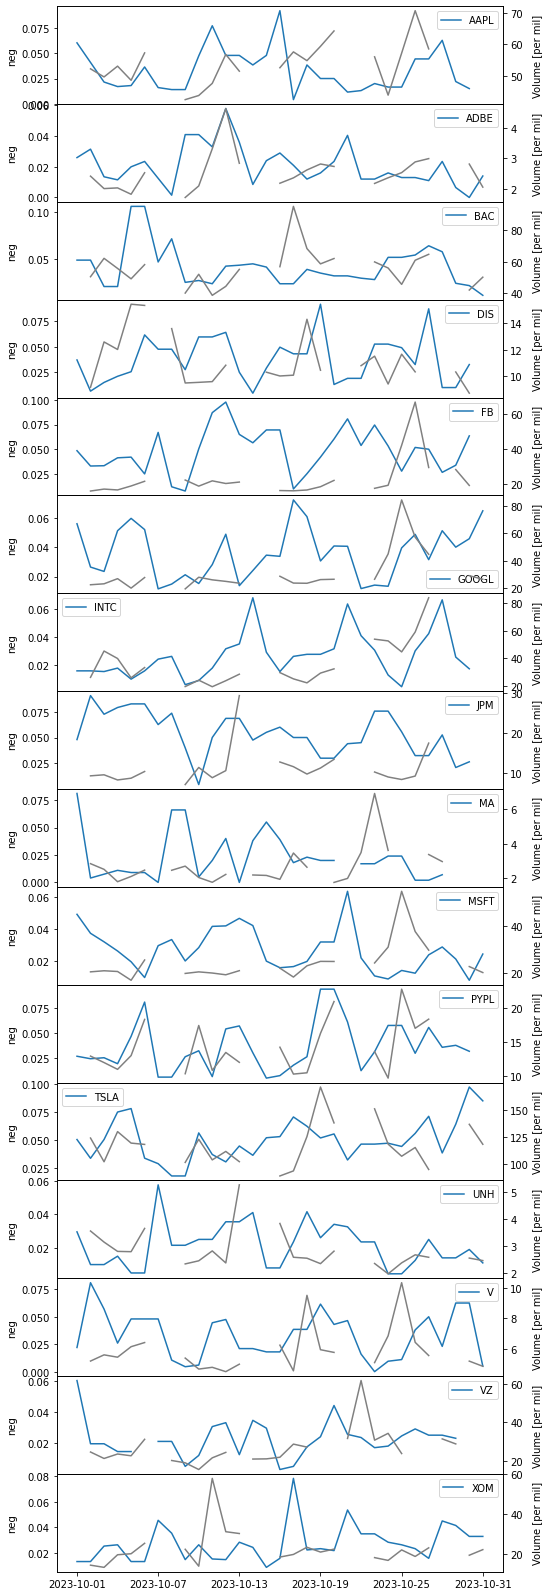

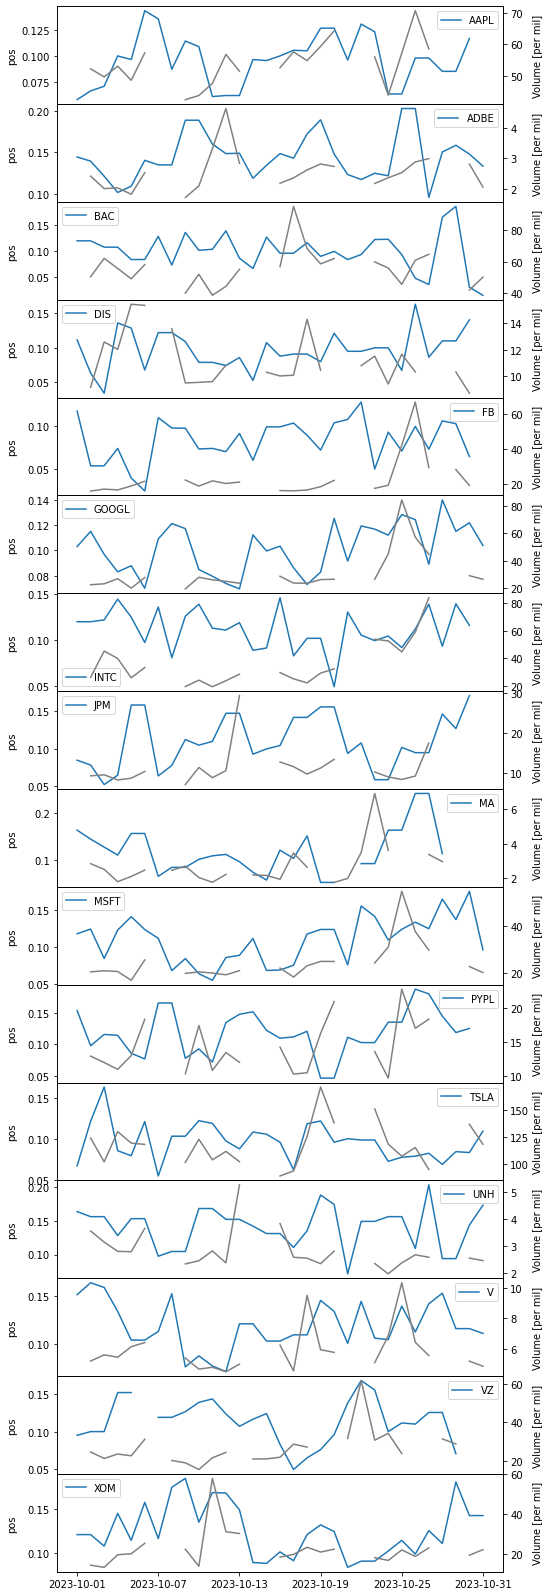

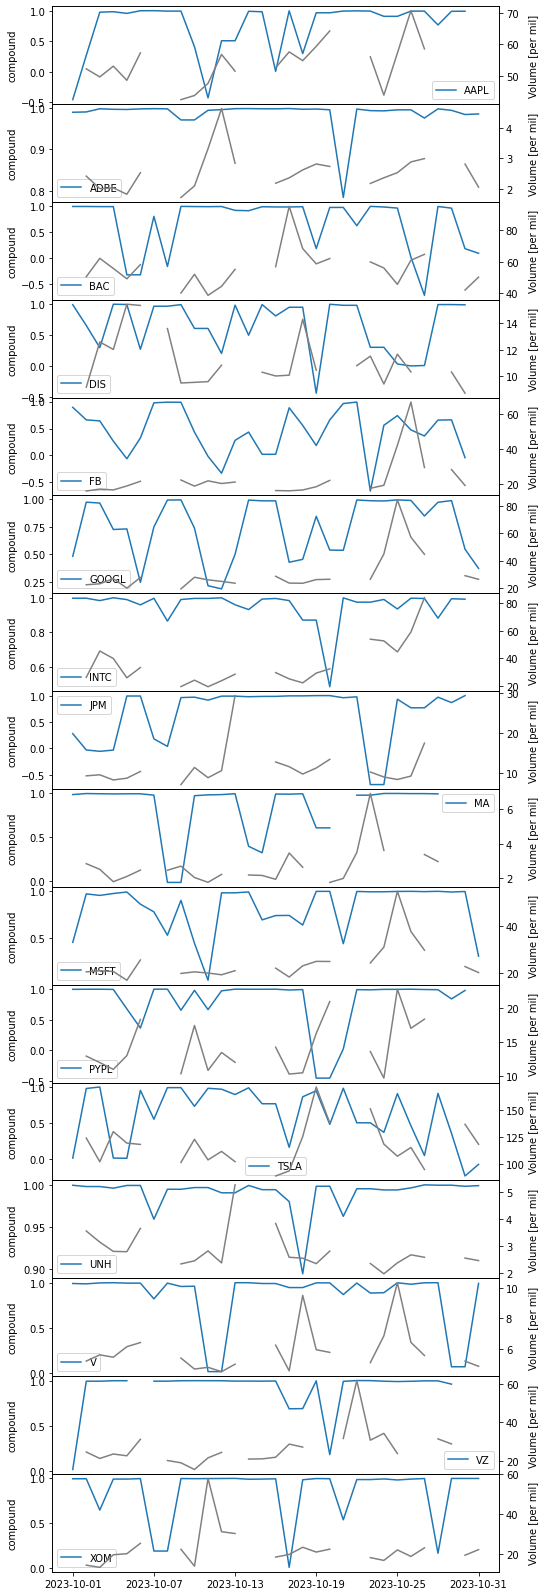

In [14]:
stocks = np.unique(data_combined['stock'])
nrows = len(stocks)

with PdfPages('scores_volume_time.pdf') as pdf:
    
    for score in ['neg', 'pos', 'compound']:
        
        fg, ax = plt.subplots(nrows=nrows, figsize=(8, nrows*1.8), sharex=True)   
        
        for i, stock in enumerate(stocks):
            mask = data_combined['stock']==stock

            mydata = data_combined[mask].sort_values(by=['date'],ignore_index=True)

            axj = ax[i].twinx()
            ax[i].plot(mydata['date'], mydata[score], label=stock)
            axj.plot(mydata['date'], mydata['volume']/1.0e6, label=stock, color='grey')

            ax[i].set_ylabel(score)
            axj.set_ylabel('Volume [per mil]')
            ax[i].legend()

        ax[0].xaxis.set_major_locator(plt.MaxNLocator(6))    
        fg.subplots_adjust(hspace=0.0)
        fg.align_labels()
        pdf.savefig(fg, bbox_inches='tight')

In [58]:
df=pd.read_csv("../data/combined_data_file.csv")

In [66]:
stocks

array(['AAPL', 'ADBE', 'BAC', 'DIS', 'FB', 'GOOGL', 'INTC', 'JPM', 'MA',
       'MSFT', 'PYPL', 'TSLA', 'UNH', 'V', 'VZ', 'XOM'], dtype=object)

In [73]:
for i in stocks:
    df.volume[df.stock=="i"].interpolate(method= 'linear', inplace=True)
    print(i)

AAPL
ADBE
BAC
DIS
FB
GOOGL
INTC
JPM
MA
MSFT
PYPL
TSLA
UNH
V
VZ
XOM


In [74]:
df.to_csv('interpolated_data.csv', index=False)

In [75]:
df.to_csv('interpolated_data1.csv', index=False)

In [82]:
df_new=pd.read_csv("interpolated_data.csv")

In [83]:
df_new

,stock,date,neg,neu,pos,compound,open,high,low,close,adj close,volume
0,BAC,2023-10-01,0.0485,0.8330,0.1190,0.9958,NaN,NaN,NaN,NaN,NaN,NaN
1,BAC,2023-10-02,0.0485,0.8330,0.1190,0.9958,27.270000,27.360001,26.580000,26.700001,26.700001,50388600.0
2,BAC,2023-10-03,0.0200,0.8730,0.1070,0.9932,26.490000,26.520000,25.820000,25.910000,25.910000,62144500.0
3,BAC,2023-10-04,0.0200,0.8730,0.1070,0.9932,25.879999,26.010000,25.580000,25.940001,25.940001,55696400.0
4,BAC,2023-10-05,0.1065,0.8100,0.0835,-0.3283,25.780001,26.090000,25.559999,26.059999,26.059999,49044100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
480,VZ,2023-10-27,0.0245,0.8640,0.1115,0.9889,34.380001,34.590000,33.340000,33.439999,33.439999,23924800.0
481,VZ,2023-10-28,0.0290,0.8610,0.1100,0.9920,NaN,NaN,NaN,NaN,NaN,26449100.0
482,VZ,2023-10-29,0.0250,0.8495,0.1255,0.9966,NaN,NaN,NaN,NaN,NaN,28973400.0
483,VZ,2023-10-30,0.0250,0.8495,0.1255,0.9966,33.840000,34.799999,33.840000,34.619999,34.619999,31497700.0


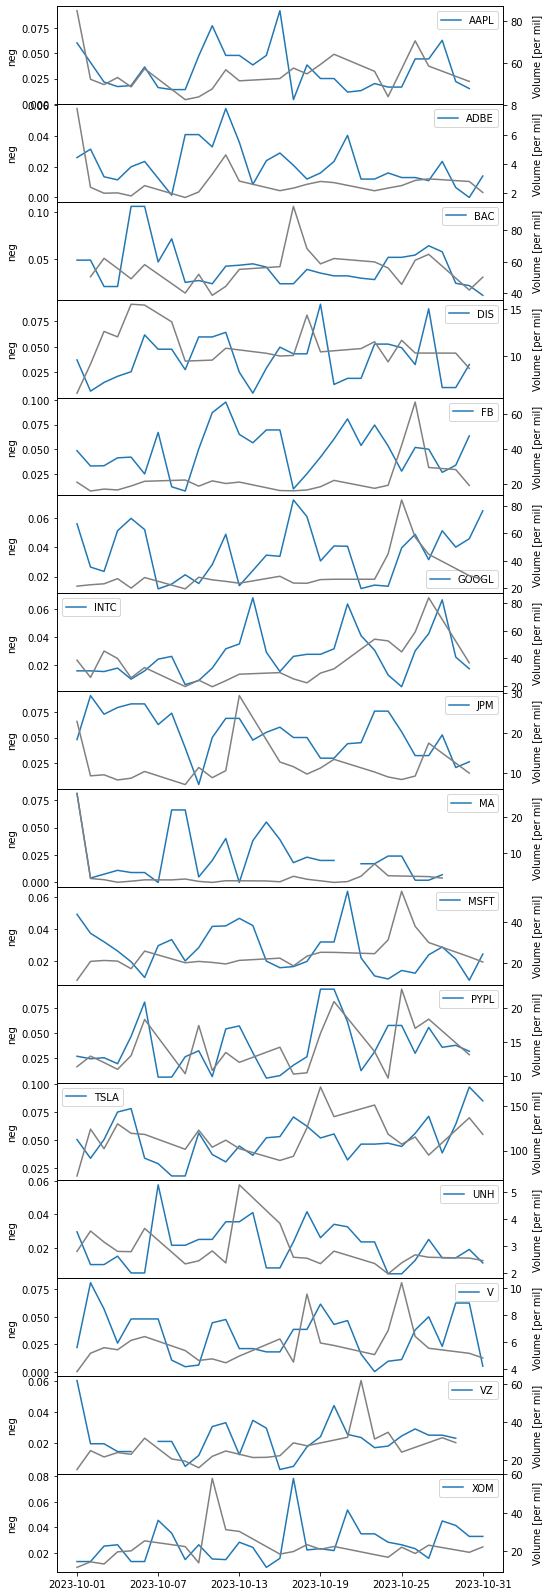

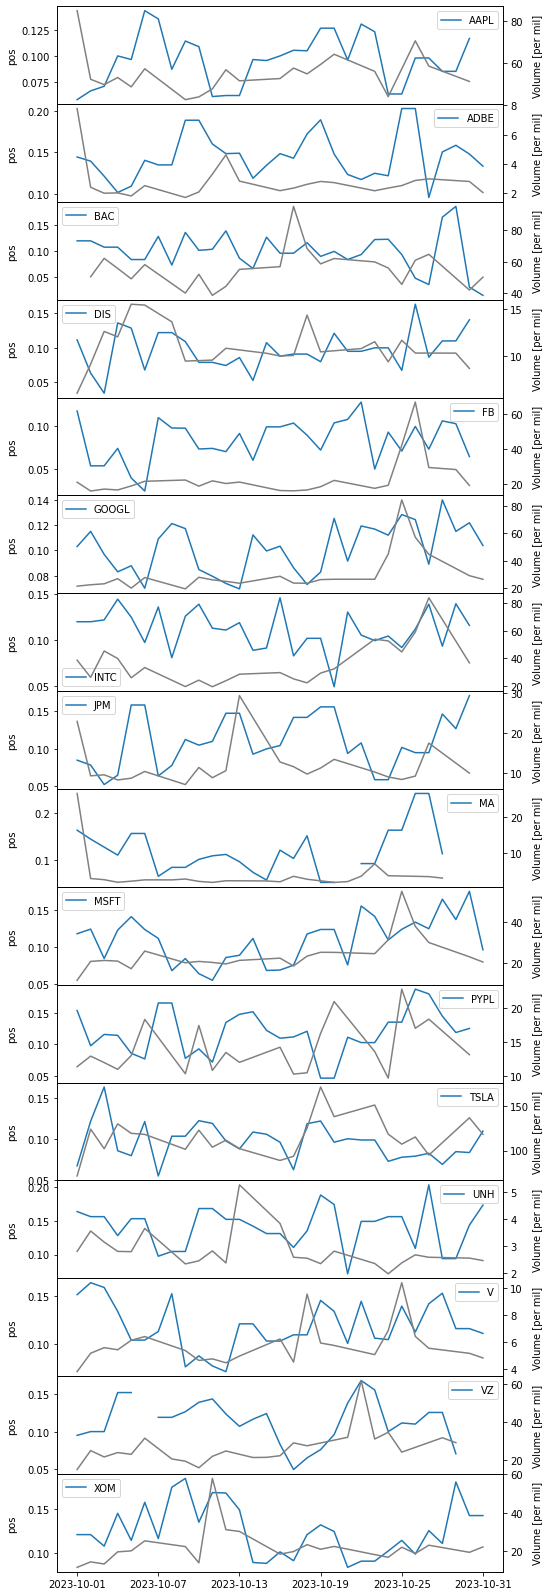

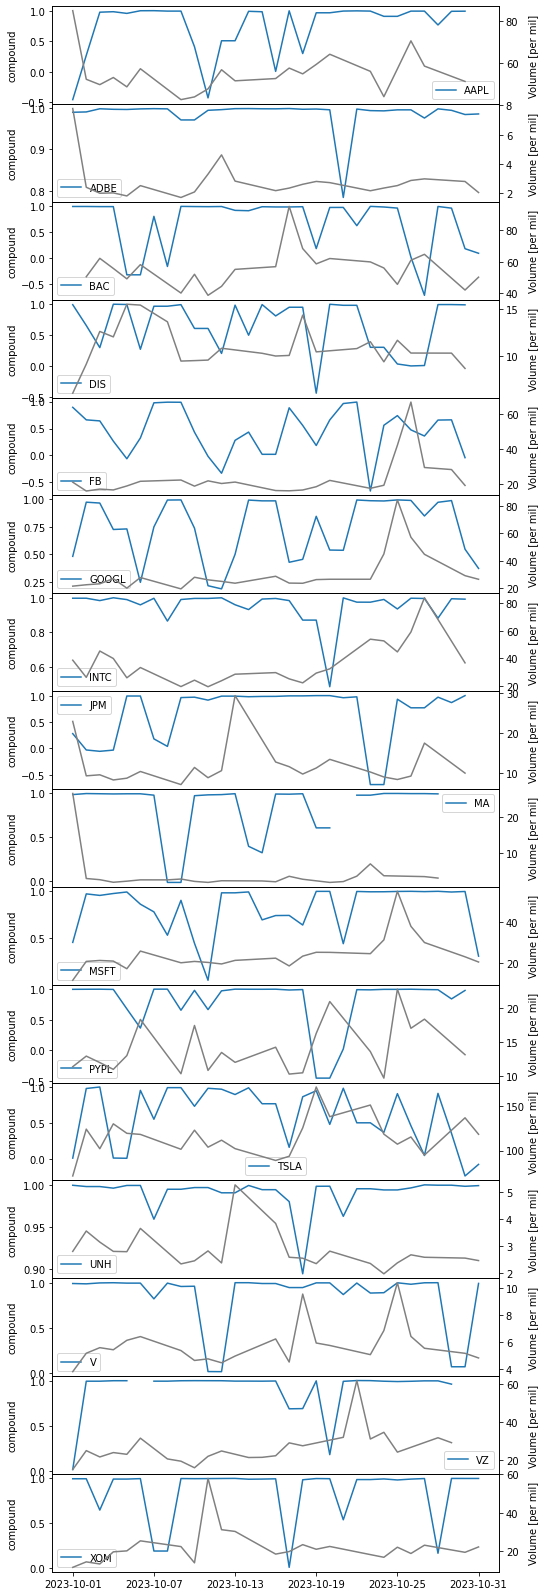

In [65]:
stocks = np.unique(df_new['stock'])
nrows = len(stocks)

with PdfPages('scores_volume_time_new.pdf') as pdf:
    
    for score in ['neg', 'pos', 'compound']:
        
        fg, ax = plt.subplots(nrows=nrows, figsize=(8, nrows*1.8), sharex=True)   
        
        for i, stock in enumerate(stocks):
            mask = df_new['stock']==stock

            mydata = df_new[mask].sort_values(by=['date'],ignore_index=True)

            axj = ax[i].twinx()
            ax[i].plot(mydata['date'], mydata[score], label=stock)
            axj.plot(mydata['date'], mydata['volume']/1.0e6, label=stock, color='grey')

            ax[i].set_ylabel(score)
            axj.set_ylabel('Volume [per mil]')
            ax[i].legend()

        ax[0].xaxis.set_major_locator(plt.MaxNLocator(6))    
        fg.subplots_adjust(hspace=0.0)
        fg.align_labels()
        pdf.savefig(fg, bbox_inches='tight')